<a href="https://colab.research.google.com/github/Justabhi96/advanced_computer_vision/blob/master/04_Object_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [0]:
IMAGE_SIZE = [100, 100, 3]

In [0]:
vgg = VGG16(input_shape = IMAGE_SIZE, weights = "imagenet", include_top = False)

x = Flatten()(vgg.output)
x = Dense(4, activation = "sigmoid")(x)
model = Model(vgg.input, x)

In [0]:
def image_generator(batch_size=64):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(50):
      X = np.zeros([batch_size] + IMAGE_SIZE)
      Y = np.zeros([batch_size, 4])

      for i in range(batch_size):
        row0 = np.random.randint(0, 90)
        col0 = np.random.randint(0, 90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)

        X[i, row0:row1, col0:col1, :] = 1
        Y[i, 0] = row0/100
        Y[i, 1] = col0/100
        Y[i, 2] = (col1-col0)/100
        Y[i, 3] = (row1-row0)/100

      yield X, Y

In [0]:
model.compile(optimizer=Adam(lr = 0.001), loss = "binary_crossentropy")
model.fit_generator(image_generator(), epochs = 5, steps_per_epoch=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 20s 403ms/step - loss: 0.6140
Epoch 2/5
50/50 [==============================] - 10s 192ms/step - loss: 0.5164
Epoch 3/5
50/50 [==============================] - 10s 193ms/step - loss: 0.5087
Epoch 4/5
50/50 [==============================] - 10s 196ms/step - loss: 0.5065
Epoch 5/5
50/50 [==============================] - 10s 198ms/step - loss: 0.5066


In [0]:
from matplotlib.patches import Rectangle
def make_prediction():
  row0 = np.random.randint(0, 90)
  col0 = np.random.randint(0, 90)
  row1 = np.random.randint(row0+10, 100)
  col1 = np.random.randint(col0+10, 100)
  print((row0, col0, col1-col0, row1-row0))
  x = np.zeros(IMAGE_SIZE)
  x[row0:row1, col0:col1, :] = 1

  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]
  print((p[0]*100, p[1]*100, p[2]*100, p[3]*100))
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle((p[1]*100, p[0]*100), p[2]*100, p[3]*100, linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()

(68, 3, 48, 18)
(67.07757115364075, 3.6056265234947205, 48.742592334747314, 21.021367609500885)


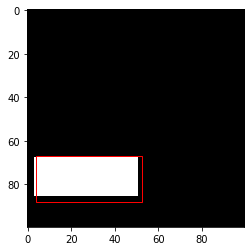

In [0]:
make_prediction()